In [5]:
from multi_funcs import *
from funcs import *
from tarjan_alg import *

In [4]:
import os
os.chdir('..')

In [27]:
results = gs_f_simulate(1000, 1000, 4)

In [6]:
len(results[0][3][0])

4211

In [28]:
make_df_cycles(10000, 4, results, save=True)

,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,10000,4,0,0,8810,0.000000
1,10000,4,0,0,8814,0.000000
2,10000,4,2,12,8788,0.001365
3,10000,4,2,7,8788,0.000797
4,10000,4,0,0,8804,0.000000
...,...,...,...,...,...,...
95,10000,4,0,0,8833,0.000000
96,10000,4,1,5,8797,0.000568
97,10000,4,0,0,8803,0.000000
98,10000,4,1,8,8822,0.000907


In [15]:
for n in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    results = gs_f_simulate(100, n, 2)
    make_df_cycles(n, 2, results, save=True)

In [27]:
results = gs_f_simulate(100, 2000, 2)
make_df_cycles(2000, 2, results, save=True)

,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,2000,2,0,0,1548,0.0
1,2000,2,0,0,1540,0.0
2,2000,2,0,0,1536,0.0
3,2000,2,0,0,1559,0.0
4,2000,2,0,0,1540,0.0
...,...,...,...,...,...,...
95,2000,2,0,0,1534,0.0
96,2000,2,0,0,1555,0.0
97,2000,2,0,0,1544,0.0
98,2000,2,0,0,1540,0.0


In [28]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/cycles')]

In [29]:
df = concat(onlyfiles, 'data/simulations/cycles/')

In [30]:
df

,Unnamed: 0,n,k,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles
0,0,10000,10,1,4524,9645,0.469051
1,1,10000,10,2,4340,9664,0.449089
2,2,10000,10,1,4203,9655,0.435318
3,3,10000,10,1,4167,9663,0.431233
4,4,10000,10,1,4290,9650,0.444560
...,...,...,...,...,...,...,...
8995,95,9000,9,1,3482,8645,0.402776
8996,96,9000,9,1,3289,8645,0.380451
8997,97,9000,9,2,3555,8646,0.411173
8998,98,9000,9,1,3425,8635,0.396642


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

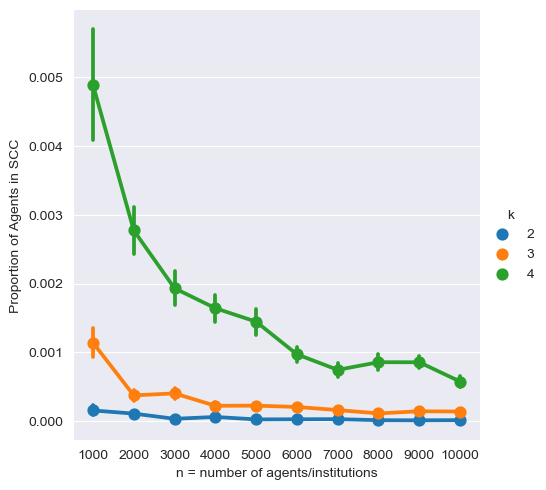

In [32]:
sns.set_style('darkgrid')
g = sns.catplot(x = 'n', y = 'percent_in_cycles', data = df[df['k'].isin([2,3,4])], kind = 'point', errorbar = 'se', hue = 'k')
g.set_axis_labels('n = number of agents/institutions', 'Proportion of Agents in SCC')

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
sns.set_style('darkgrid')
sns.pointplot(x = 'n', y = 'value', data = df3[df3['k'] == 2], ax = axs[0])
sns.pointplot(x = 'n', y = 'value', data = df[df['k'] == 3], ax = axs[1])
sns.pointplot(x = 'n', y = 'value', data = df[df['k'] == 4], ax = axs[2])

In [33]:
df2 = df[df['k'].isin([2,3,4])]

In [34]:
df3 = df2.groupby(['n', 'k'], as_index=False).mean()

In [35]:
df3['value'] = 1/df3['percent_in_cycles']

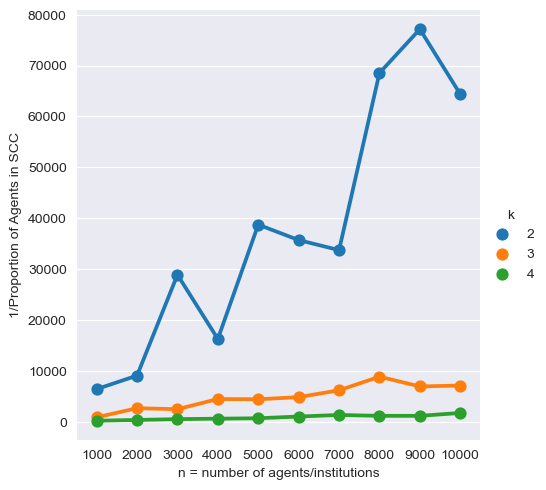

In [36]:
sns.set_style('darkgrid')
g = sns.catplot(x = 'n', y = 'value', data = df3, kind = 'point', errorbar = 'se', hue = 'k')
g.set_axis_labels('n = number of agents/institutions', '1/Proportion of Agents in SCC')

In [26]:
df3

,n,k,Unnamed: 0,n_cycles,n_agents_in_cycles,n_matches,percent_in_cycles,value
0,1000,2,49.5,0.05,0.12,771.94,0.000156,6.414695e+03
1,1000,3,49.5,0.30,0.96,841.11,0.001141,8.764988e+02
2,1000,4,49.5,0.87,4.33,883.20,0.004889,2.045405e+02
3,2000,2,49.5,0.00,0.00,1543.25,0.000000,inf
4,2000,3,49.5,0.22,0.63,1682.04,0.000375,2.668705e+03
5,2000,4,49.5,1.03,4.89,1762.98,0.002772,3.607841e+02
6,3000,2,49.5,0.04,0.08,2316.61,0.000035,2.888652e+04
7,3000,3,49.5,0.34,1.02,2522.10,0.000404,2.474549e+03
8,3000,4,49.5,0.99,5.11,2644.29,0.001931,5.178103e+02
9,4000,2,49.5,0.09,0.19,3086.79,0.000061,1.627726e+04


How can we test this some more. We know that the algorithm is correct. So now we want to make sure. Let's take a small matrix of results. Make sure that it's basically "correct" in drawing the pointing graphs. 

In [6]:
example = mdf_np(10, 3)
example1 = example.copy()

In [7]:
example


,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,4,2,1,0,0,0,False,0.433847,0.411073,0.988279,True
1,4,5,7,1,0,0,False,0.587682,0.918020,0.469323,True
2,5,9,6,2,0,0,False,0.744770,0.992370,0.500499,True
3,4,0,7,3,0,0,False,0.369479,0.862737,0.950699,True
4,3,8,5,4,0,0,False,0.933665,0.505269,0.920547,True
5,5,2,6,5,0,0,False,0.800159,0.305330,0.480513,True
6,2,6,4,6,0,0,False,0.445312,0.797814,0.933102,True
7,6,1,4,7,0,0,False,0.175756,0.439517,0.567015,True
8,3,7,9,8,0,0,False,0.490573,0.190516,0.456238,True
9,4,9,5,9,0,0,False,0.025549,0.370317,0.322430,True


In [8]:
matches = run_gale_shapley(example, 3)

In [11]:
matches[0]

,0,1,2,student_id,applications,k,matched,rank1,rank2,rank3,underdemanded
0,1,1,1,0,2,1,False,0.988279,0.988279,0.988279,True
1,4,5,7,1,0,1,False,0.587682,0.918020,0.469323,False
2,9,6,6,2,1,1,False,0.992370,0.500499,0.500499,False
3,0,7,7,3,1,1,False,0.862737,0.950699,0.950699,True
4,3,8,5,4,0,1,False,0.933665,0.505269,0.920547,False
5,5,2,6,5,0,1,False,0.800159,0.305330,0.480513,False
6,2,6,4,6,0,1,False,0.445312,0.797814,0.933102,False
7,6,1,4,7,0,1,False,0.175756,0.439517,0.567015,True
8,7,9,9,8,1,1,False,0.190516,0.456238,0.456238,True


In [12]:
find_cycles(example1, matches[0], k=3)

(   new_id_x  new_id_y
 0         0         4
 1         0         5
 2         1         6
 3         2         4
 4         3         7,
 0,
 [])

In [37]:
import sys
print(sys.getrecursionlimit())

3000
